# Model Training and Feature Engineering

In [1]:
import sys
import os
import missingno as msno
sys.path.append('../scripts')
from data_loader import *
from sklearn_pipeline import *
from feature_engineering import *
from model_traning import *

## Load Datasets

In [2]:
# path to the CSV file
filename = 'preprocessed_merged_20240531_015454.parquet'
path = os.path.join('..', 'data/02_intermediate', filename)

# Load dataset
merged_df = load_dataset(path)
merged_df['Promo2'] = merged_df['Promo2'].astype(float)
merged_df['Promo'] = merged_df['Promo'].astype(float)
merged_df['StateHoliday'] = merged_df['StateHoliday'].astype(float)
merged_df['SchoolHoliday'] = merged_df['SchoolHoliday'].astype(float)
merged_df['Assortment'] = merged_df['Assortment'].astype(float)
merged_df['Promo'] = merged_df['Promo'].astype(float)
merged_df['Open'] = merged_df['Open'].astype(float)
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1.0,1.0,0.0,1.0,2,0.0,1270.0,9.0,2008.0,0.0,23.269093,2011.752774,-1
1,2,5,2015-07-31,6064,625,1.0,1.0,0.0,1.0,0,0.0,570.0,11.0,2007.0,1.0,13.000000,2010.000000,0
2,3,5,2015-07-31,8314,821,1.0,1.0,0.0,1.0,0,0.0,14130.0,12.0,2006.0,1.0,14.000000,2011.000000,0
3,4,5,2015-07-31,13995,1498,1.0,1.0,0.0,1.0,2,2.0,620.0,9.0,2009.0,0.0,23.269093,2011.752774,-1
4,5,5,2015-07-31,4822,559,1.0,1.0,0.0,1.0,0,0.0,29910.0,4.0,2015.0,0.0,23.269093,2011.752774,-1


In [6]:
merged_df['DayOfWeek'].unique()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  float64       
 6   Promo                      1017209 non-null  float64       
 7   StateHoliday               1017209 non-null  float64       
 8   SchoolHoliday              1017209 non-null  float64       
 9   StoreType                  1017209 non-null  int32         
 10  Assortment                 1017209 non-null  float64       
 11  CompetitionDistance        1017209 no

## Explore Target Variable

Target variable: Sales
Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64


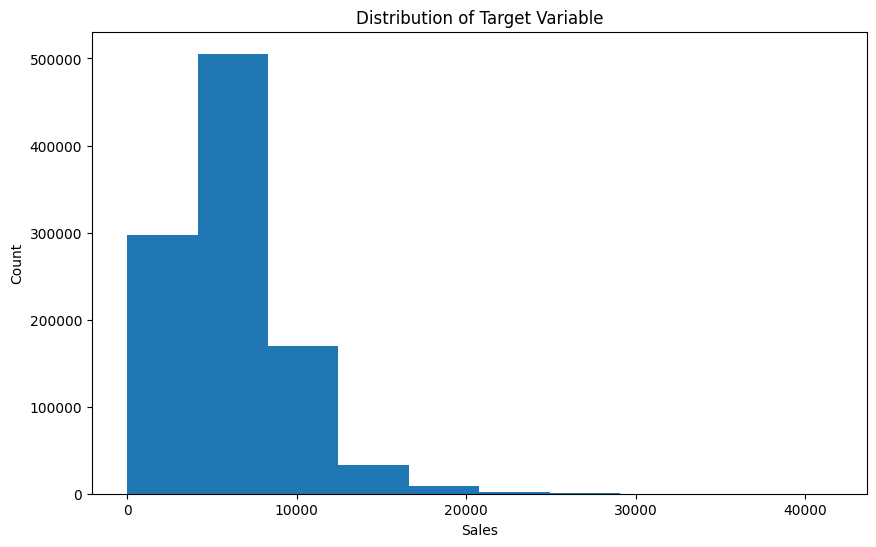

In [4]:
explore_target_variable(merged_df,'Sales')

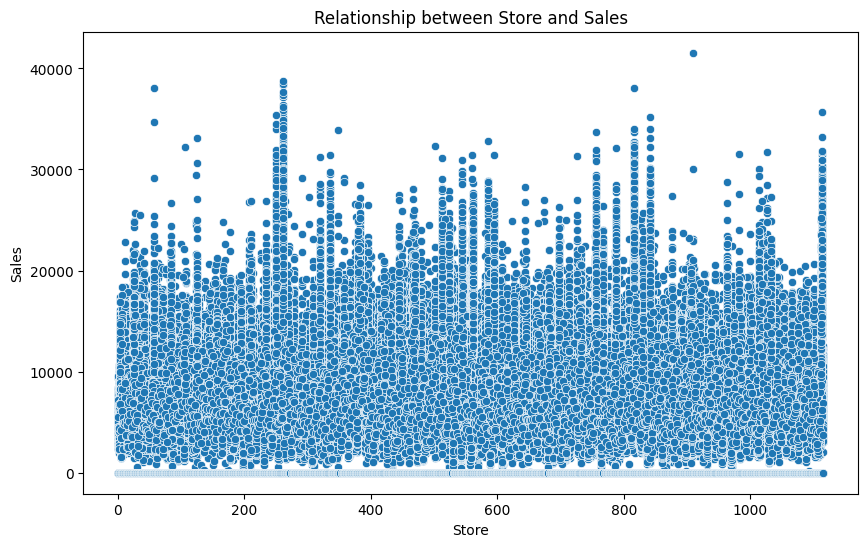

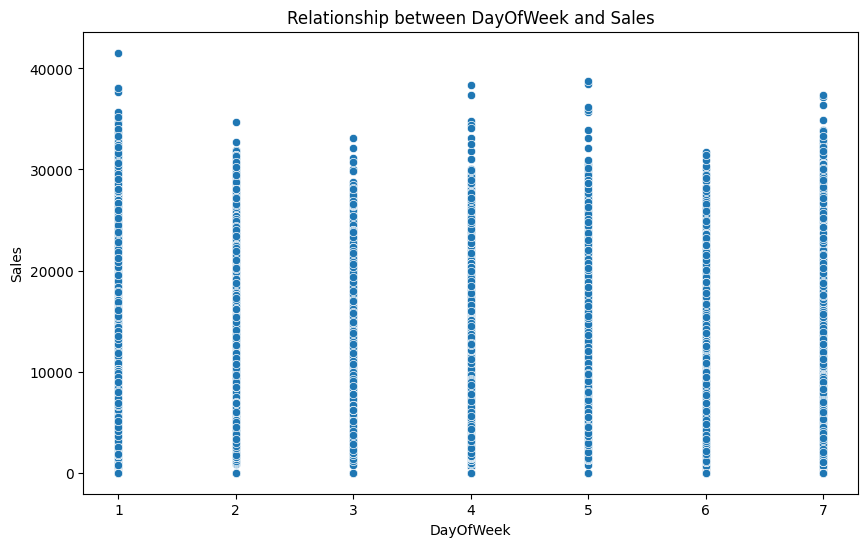

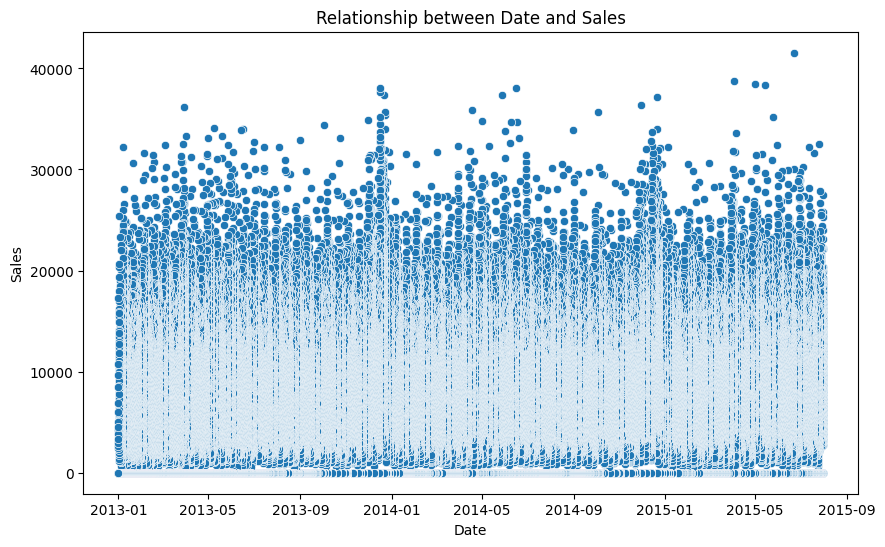

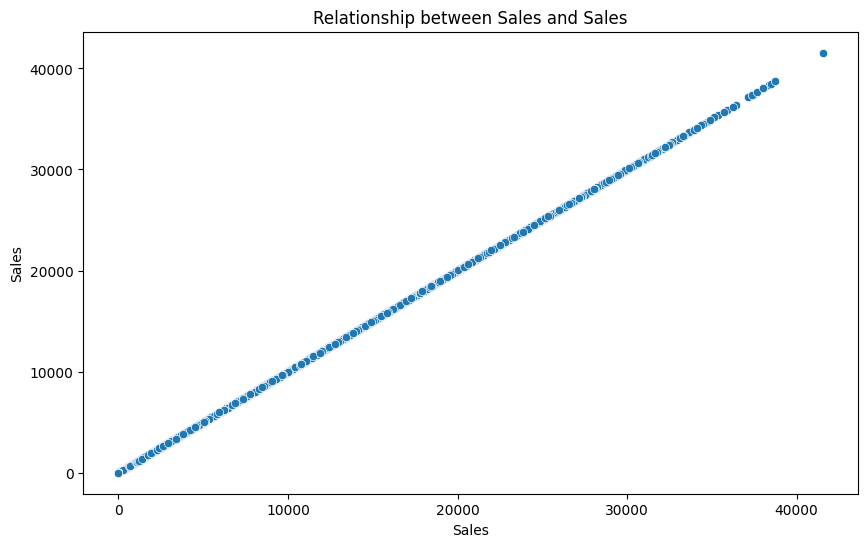

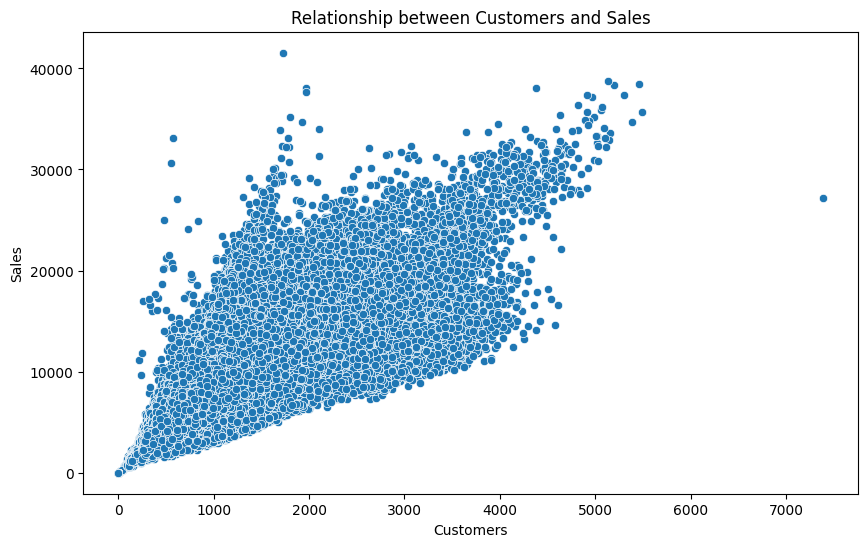

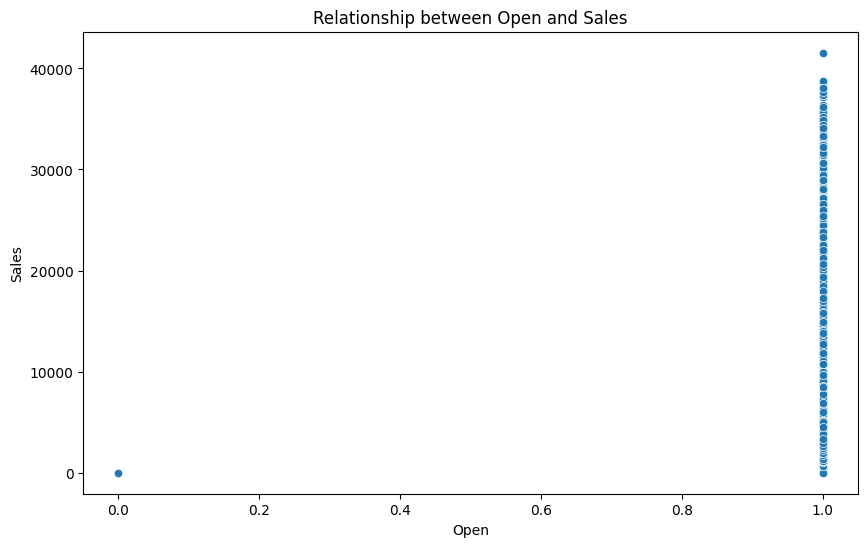

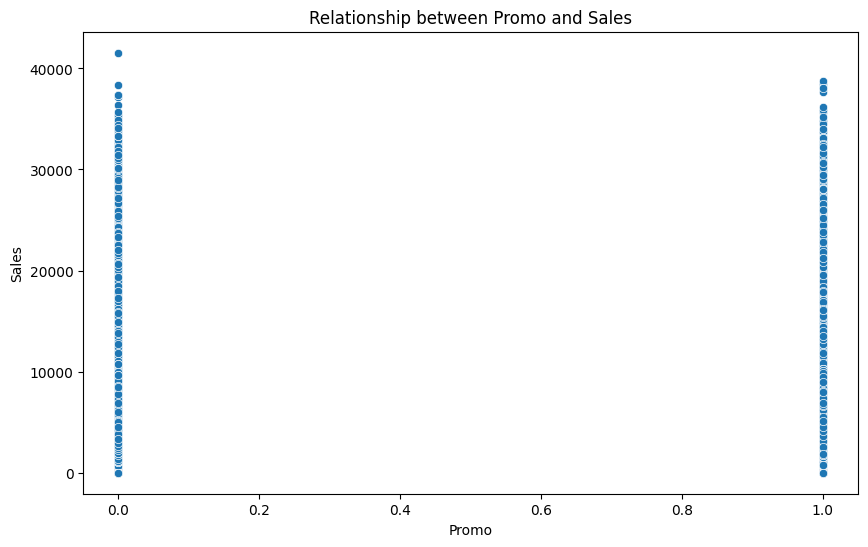

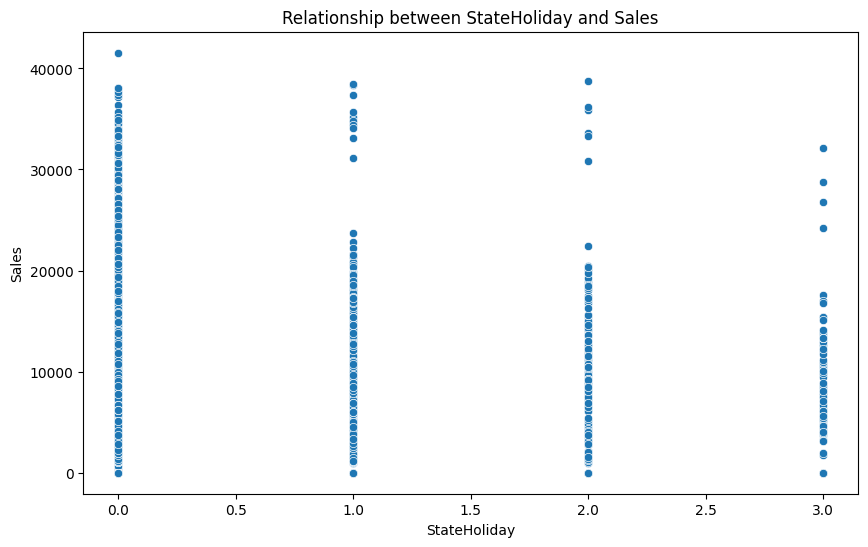

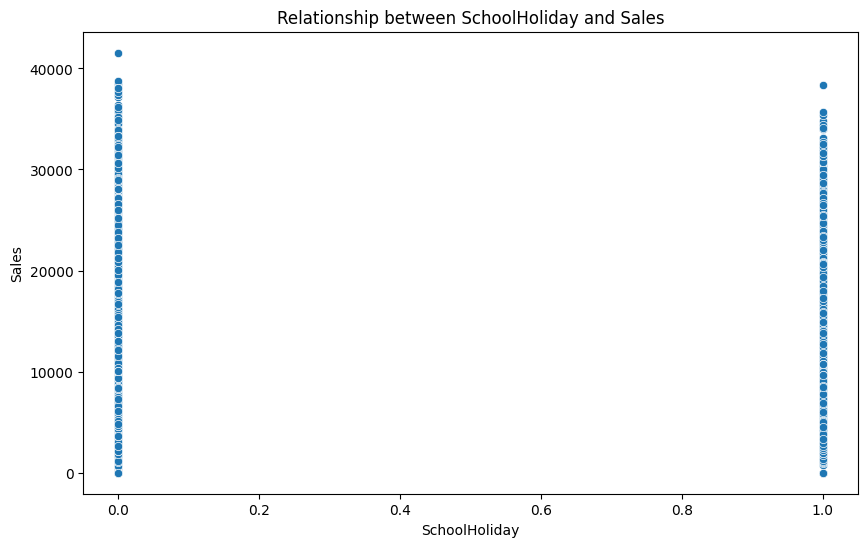

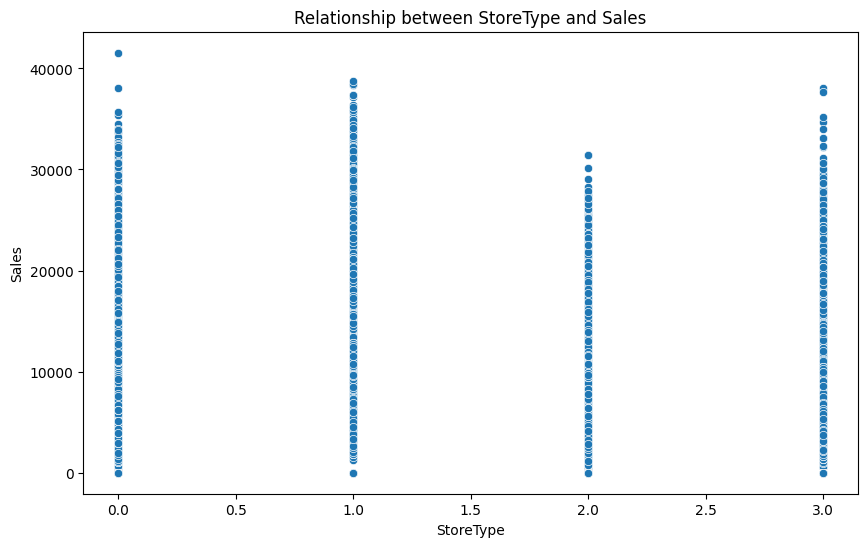

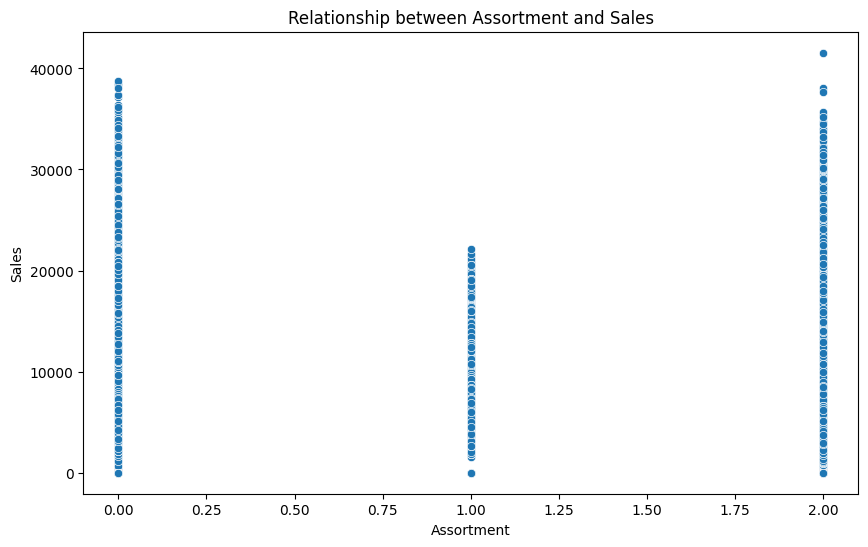

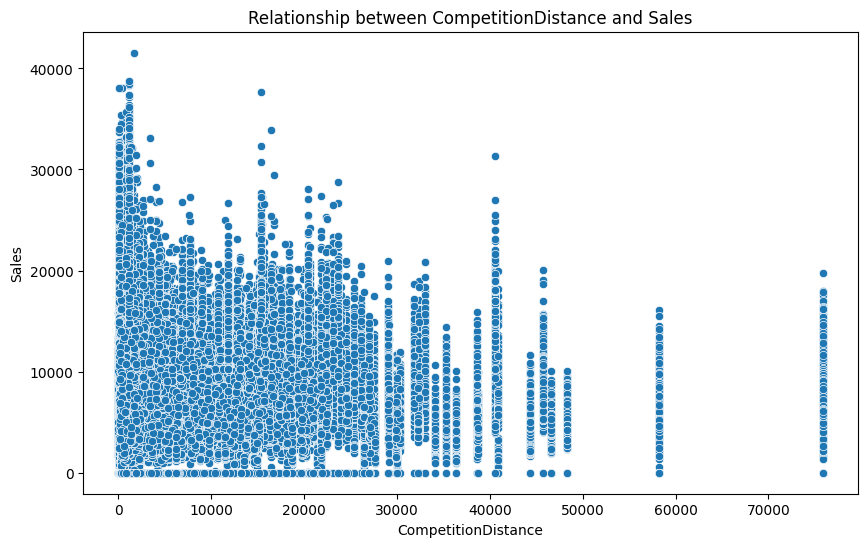

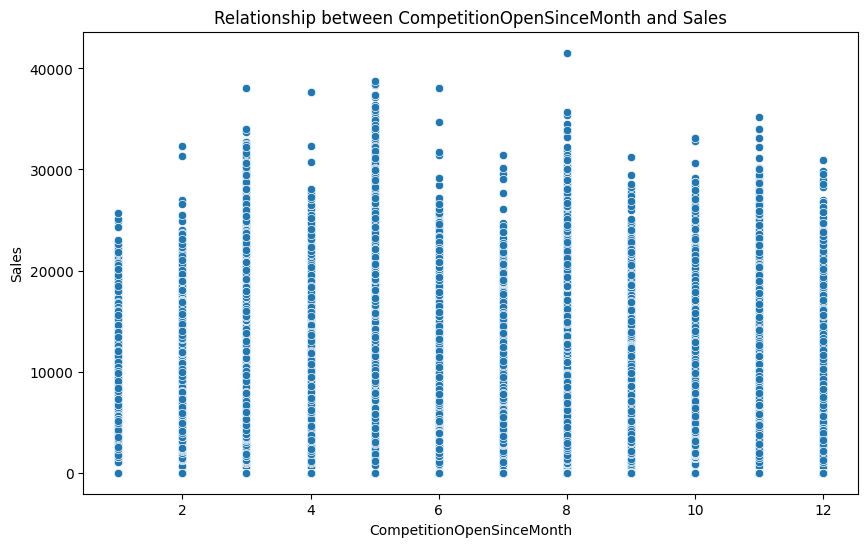

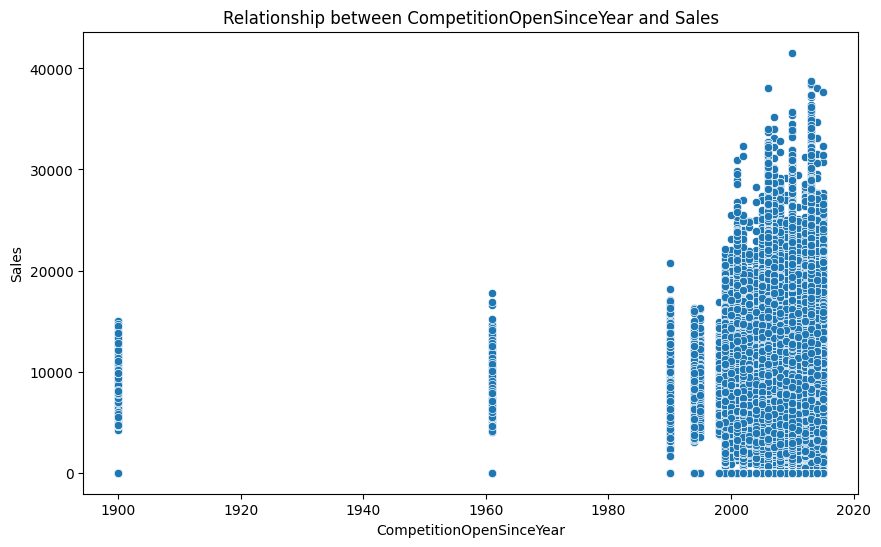

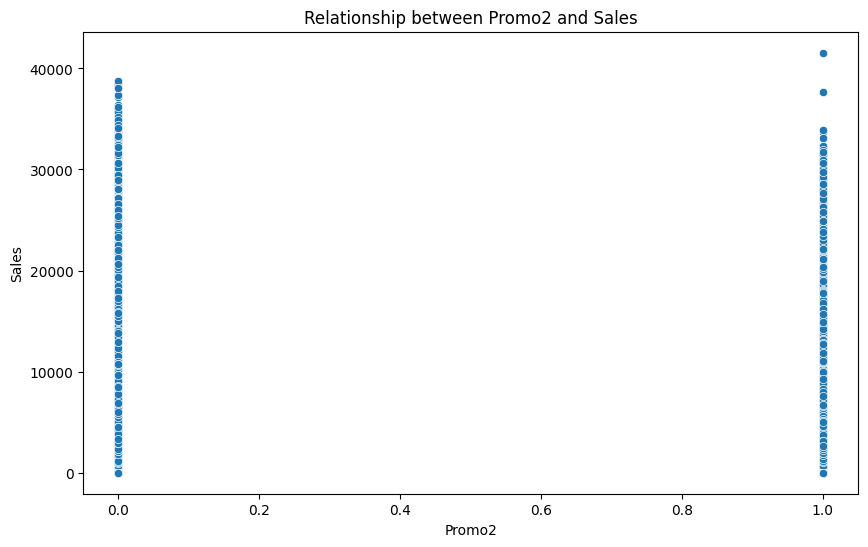

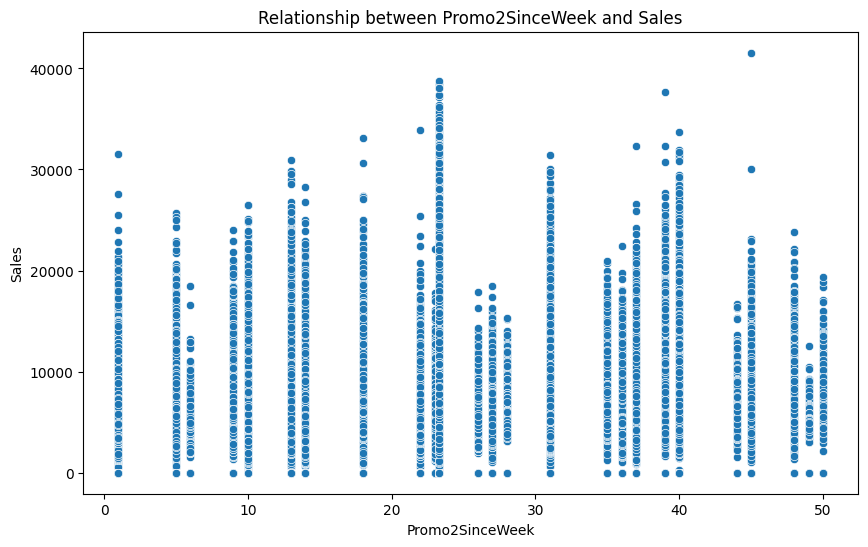

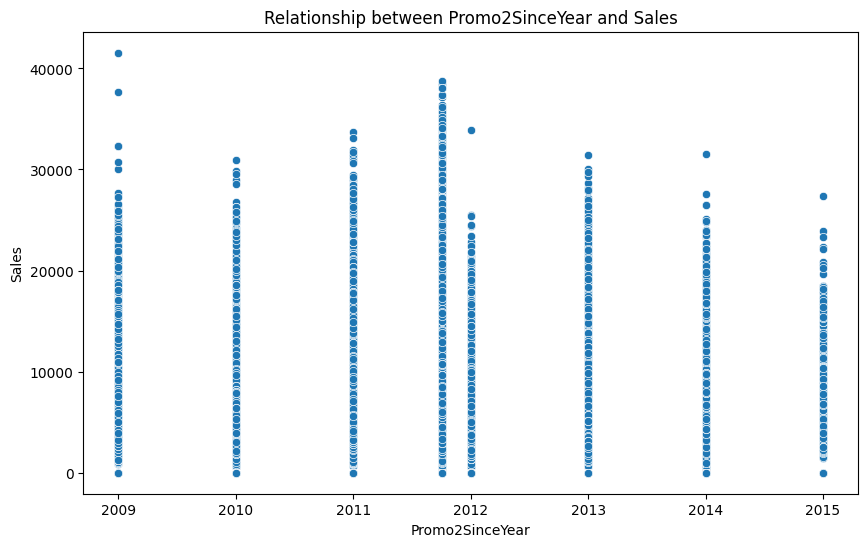

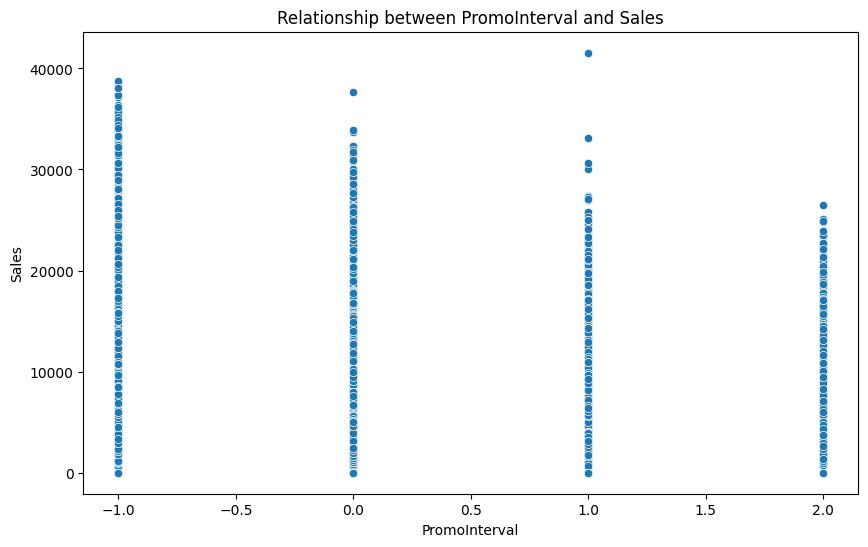

In [5]:
analyze_feature_target_relationship(merged_df,'Sales')

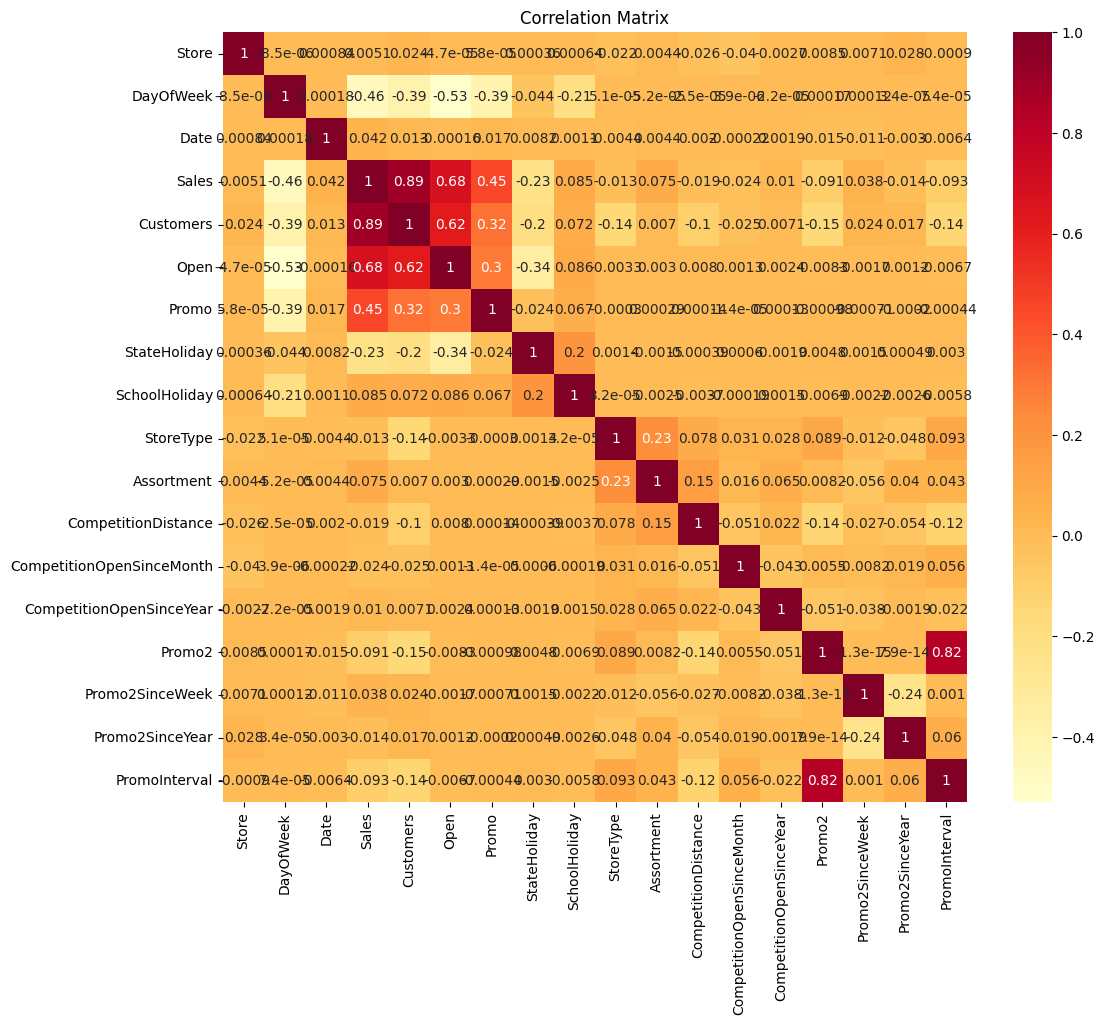

In [7]:
corr_matrix = check_multicollinearity(merged_df)

# Feature Engineering

In [3]:
X_train, X_val, y_train, y_val = engineer_features(merged_df)

In [7]:
X_train

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,DayOfMonth,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,Month,Quarter,Year,Season,PromoDuration,CompetitionDuration
0,344.0,7.0,2014-06-22,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,22.0,0.0,0.0,1.0,6.0,2.0,2014.0,2.0,104561.0,38.0
1,108.0,7.0,2013-11-17,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,17.0,0.0,1.0,0.0,11.0,4.0,2013.0,0.0,104588.413345,122.0
2,299.0,5.0,2013-09-06,749.0,1.0,0.0,0.0,0.0,3.0,2.0,...,6.0,1.0,0.0,0.0,9.0,3.0,2013.0,0.0,104598.413345,12.0
3,402.0,5.0,2015-04-24,475.0,1.0,0.0,0.0,0.0,2.0,2.0,...,24.0,0.0,0.0,1.0,4.0,2.0,2015.0,1.0,104516.0,43.0
4,742.0,3.0,2014-06-18,1049.0,1.0,1.0,0.0,0.0,3.0,2.0,...,18.0,0.0,1.0,0.0,6.0,2.0,2014.0,2.0,104609.413345,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813762,426.0,7.0,2014-12-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,1.0,0.0,0.0,12.0,4.0,2014.0,3.0,104585.413345,52.0
813763,510.0,5.0,2014-08-15,866.0,1.0,0.0,0.0,1.0,0.0,2.0,...,15.0,0.0,1.0,0.0,8.0,3.0,2014.0,2.0,104601.413345,48.0
813764,363.0,6.0,2015-04-04,1097.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,4.0,2.0,2015.0,1.0,104620.413345,67.0
813765,711.0,4.0,2013-11-07,561.0,1.0,1.0,0.0,0.0,3.0,0.0,...,7.0,1.0,0.0,0.0,11.0,4.0,2013.0,0.0,104480.0,80.0


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813767 entries, 417683 to 121958
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      813767 non-null  float64
 1   DayOfWeek                  813767 non-null  float64
 2   Customers                  813767 non-null  float64
 3   Open                       813767 non-null  float64
 4   Promo                      813767 non-null  float64
 5   StateHoliday               813767 non-null  float64
 6   SchoolHoliday              813767 non-null  float64
 7   StoreType                  813767 non-null  float64
 8   Assortment                 813767 non-null  float64
 9   CompetitionDistance        813767 non-null  float64
 10  CompetitionOpenSinceMonth  813767 non-null  float64
 11  CompetitionOpenSinceYear   813767 non-null  float64
 12  Promo2                     813767 non-null  float64
 13  Promo2SinceWeek            81

In [11]:
# Define output folder and file name
output_folder = os.path.join('..', 'data/02_intermediate')
filename = 'y_train_df.parquet'

output_path = save_dataset(y_train, output_folder, filename)

Error: 'Series' object has no attribute 'to_parquet'. An unknown error occurred while saving the dataset.


## Convert to NumPy arrays

In [12]:
import pandas as pd
X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()

In [14]:
X_train_np

array([[344.0, 7.0, Timestamp('2014-06-22 00:00:00'), ..., 2.0, 104561.0,
        38.0],
       [108.0, 7.0, Timestamp('2013-11-17 00:00:00'), ..., 0.0,
        104588.4133446457, 122.0],
       [299.0, 5.0, Timestamp('2013-09-06 00:00:00'), ..., 0.0,
        104598.4133446457, 12.0],
       ...,
       [363.0, 6.0, Timestamp('2015-04-04 00:00:00'), ..., 1.0,
        104620.4133446457, 67.0],
       [711.0, 4.0, Timestamp('2013-11-07 00:00:00'), ..., 0.0, 104480.0,
        80.0],
       [424.0, 1.0, Timestamp('2015-04-13 00:00:00'), ..., 1.0, 104596.0,
        56.0]], dtype=object)